# Solar-System15-DynamicalProblem Float64 Small Integration

<ul id="top">
<li><a href="#Loading-packages"> 
             Loading Packages</a></li>
    
<li><a href="#Computer-properties"> 
             Computer properties</a></li> 

<li><a href="#Initial-value-problem:-Pleiades">
             Initial value problem: Pleiades</a></li>

<li><a href="#Ode-problem">
             Ode problem</a></li>
             
<li><a href="#DynamicalODEProblem">
             DynamicalODEProblem</a></li>

<li><a href="#2nd-Order-Problem">
             2nd Order Problem</a></li>

<li><a href="#Error-in-energy">
             Error in energy</a></li> 

<li><a href="#Work-Precision-diagrams">
             Work-Precision diagrams</a></li> 

</ul>  

## Loading packages

In [1]:
using OrdinaryDiffEq,DiffEqDevTools,BenchmarkTools
using IRKGaussLegendre
using Plots,LinearAlgebra
using Dates
using RecursiveArrayTools
using JLD2, FileIO

In [2]:
setprecision(BigFloat, 108)

108

In [3]:
#plotly()

<a href="#top">Back to the top</a>

## Computer properties

In [4]:
#export JULIA_NUM_THREADS=2
Threads.nthreads()

2

In [5]:
;cat /proc/cpuinfo # on Linux machines

┌ Warning: Parsing command "cat /proc/cpuinfo # on Linux machines". Special characters "#{}()[]<>|&*?~;" should now be quoted in commands
│   caller = #shell_parse#350(::String, ::typeof(Base.shell_parse), ::String, ::Bool) at shell.jl:107
└ @ Base ./shell.jl:107


processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 42
model name	: Intel(R) Core(TM) i5-2520M CPU @ 2.50GHz
stepping	: 7
microcode	: 0x2f
cpu MHz		: 1204.937
cache size	: 3072 KB
physical id	: 0
siblings	: 4
core id		: 0
cpu cores	: 2
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss ht tm pbe syscall nx rdtscp lm constant_tsc arch_perfmon pebs bts rep_good nopl xtopology nonstop_tsc cpuid aperfmperf pni pclmulqdq dtes64 monitor ds_cpl vmx smx est tm2 ssse3 cx16 xtpr pdcm pcid sse4_1 sse4_2 x2apic popcnt tsc_deadline_timer aes xsave avx lahf_lm epb pti ssbd ibrs ibpb stibp tpr_shadow vnmi flexpriority ept vpid xsaveopt dtherm ida arat pln pts md_clear flush_l1d
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs itlb_multihit
bogomips	: 4988.52
clflush size	: 64
cache_alignment	: 64
address siz

cat: '#': No such file or directory
cat: on: No such file or directory
cat: Linux: No such file or directory
cat: machines: No such file or directory


In [6]:
using Hwloc
Hwloc.num_physical_cores()

2

<a href="#top">Back to the top</a>

## Initial value problem: Solar-System15

In [3]:
include("../examples/Nbody.jl")
include("../examples/InitialNBody15.jl")
u0, Gm =InitialNBody15();

q0=u0[2,:,:]
v0=u0[1,:,:]

t0=0.0
t1=1000.
mysaveat=10

tspan=(t0,t1);

In [4]:
u0128, Gm128 =InitialNBody15(BigFloat)
tspan128=(BigFloat(t0),BigFloat(t1))
prob128=ODEProblem(NbodyODE!,u0128,tspan128,Gm128);

<a href="#top">Back to the top</a>

## Ode problem

### Test solution

In [9]:
prob128 = ODEProblem(NbodyODE!,u0128,tspan128,Gm128);
sol =solve(prob128,Vern9(),saveat=mysaveat,abstol=1e-20,reltol=1e-20,maxiters=100000);
test_sol = TestSolution(sol);
@save "./Data/solarsystem15small_test_solF64.jld2" sol
#
#@load "./Data/solarsystem15small_test_solF64.jld2" sol
test_sol = TestSolution(sol);

In [10]:
prob = ODEProblem(NbodyODE!,u0,tspan,Gm);
sol1 = solve(prob,Vern9(),saveat=mysaveat,abstol=1e-12,reltol=1e-12);
sol1.destats

DiffEqBase.DEStats
Number of function 1 evaluations:                  6434
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    0
Number of linear solves:                           0
Number of Jacobians created:                       0
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          402
Number of rejected steps:                          0

In [11]:
(sol2,iters2,steps2) = solve(prob,IRKGL16(),dt=10,saveat=mysaveat,adaptive=false,myouputs=true);
sol2.destats

DiffEqBase.DEStats
Number of function 1 evaluations:                  9341
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    0
Number of linear solves:                           0
Number of Jacobians created:                       0
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          100
Number of rejected steps:                          0

In [12]:
(sol3,iters3,steps3) = solve(prob,IRKGL16(),reltol=1e-12, saveat=mysaveat,abstol=1e-12, adaptive=true,myoutputs=true)
sol3.destats

DiffEqBase.DEStats
Number of function 1 evaluations:                  9361
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    0
Number of linear solves:                           0
Number of Jacobians created:                       0
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          77
Number of rejected steps:                          22

In [13]:
(sol4,iters4,steps4) = solve(prob,IRKGL162(), saveat=mysaveat,reltol=1e-12, abstol=1e-12, adaptive=true,myoutputs=true);
sol4.destats

DiffEqBase.DEStats
Number of function 1 evaluations:                  15313
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    0
Number of linear solves:                           0
Number of Jacobians created:                       0
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          77
Number of rejected steps:                          22

In [14]:
(mean(iters3),mean(iters4))

(10.777777777777779, 17.22222222222222)

In [15]:
#plot(sol3)

<a href="#top">Back to the top</a>

## DynamicalODEProblem

In [16]:
probdyn = DynamicalODEProblem(NbodyODEq!,NbodyODEv!,q0,v0,tspan,Gm);
#probdyn = DynamicalODEProblem(NbodyODEv!,NbodyODEq!,v0,q0,tspan,Gm);

In [17]:
sol11 = solve(probdyn,Vern9(),saveat=mysaveat,abstol=1e-12,reltol=1e-12);
sol11.destats

DiffEqBase.DEStats
Number of function 1 evaluations:                  7842
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    0
Number of linear solves:                           0
Number of Jacobians created:                       0
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          405
Number of rejected steps:                          85

In [18]:
(sol12, iters12, steps12)= solve(probdyn,IRKGL163(),dt=10,saveat=mysaveat,adaptive=false,myoutputs=true);

In [19]:
sol12.destats

DiffEqBase.DEStats
Number of function 1 evaluations:                  5909
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    0
Number of linear solves:                           0
Number of Jacobians created:                       0
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          100
Number of rejected steps:                          0

In [20]:
(sol13,iters13,steps13) = solve(probdyn,IRKGL163(),reltol=1e-12, abstol=1e-12, saveat=mysaveat,
                                   adaptive=true,myoutputs=true);

In [21]:
sol13.destats

DiffEqBase.DEStats
Number of function 1 evaluations:                  6224
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    0
Number of linear solves:                           0
Number of Jacobians created:                       0
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          77
Number of rejected steps:                          22

In [22]:
mean(iters13)

7.222222222222222

In [23]:
#plot(sol13)

In [24]:
typeof(sol11.u)

Array{ArrayPartition{Float64,Tuple{Array{Float64,2},Array{Float64,2}}},1}

<a href="#top">Back to the top</a>

## 2nd Order Problem

In [5]:
prob2nd = SecondOrderODEProblem(NbodyODE2nd!,v0,q0,tspan,Gm);

In [26]:
sol21 = solve(prob2nd,Vern9(),abstol=1e-12,reltol=1e-12,saveat=mysaveat);
sol21.destats

DiffEqBase.DEStats
Number of function 1 evaluations:                  7842
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    0
Number of linear solves:                           0
Number of Jacobians created:                       0
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          405
Number of rejected steps:                          85

In [9]:
sol22 = solve(prob2nd,DPRKN12(),abstol=1e-12,reltol=1e-12,saveat=mysaveat);
#sol22 = solve(prob2nd,DPRKN12(),abstol=1e-12,reltol=1e-12);
sol22.destats
# something is wrong using saveat

DiffEqBase.DEStats
Number of function 1 evaluations:                  3216
Number of function 2 evaluations:                  190
Number of W matrix evaluations:                    0
Number of linear solves:                           0
Number of Jacobians created:                       0
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          171
Number of rejected steps:                          18

In [28]:
#plot(sol22)

In [29]:
typeof(sol21.u)

Array{ArrayPartition{Float64,Tuple{Array{Float64,2},Array{Float64,2}}},1}

<a href="#top">Back to the top</a>

## Error in energy

In [30]:
setprecision(BigFloat, 256)
u0128, Gm128 =InitialNBody15(BigFloat)
E0=NbodyEnergy(u0128,Gm128)

ΔE = map(x->NbodyEnergy(BigFloat.(x),Gm128), sol.u)./E0.-1
ΔE1 = map(x->NbodyEnergy(BigFloat.(x),Gm128), sol1.u)./E0.-1
ΔE2 = map(x->NbodyEnergy(BigFloat.(x),Gm128), sol2.u)./E0.-1
ΔE3 = map(x->NbodyEnergy(BigFloat.(x),Gm128), sol3.u)./E0.-1
ΔE4 = map(x->NbodyEnergy(BigFloat.(x),Gm128), sol4.u)./E0.-1
ΔE11 = map(x->NbodyEnergy2(BigFloat.(x),Gm128), sol11.u)./E0.-1;
ΔE12 = map(x->NbodyEnergy2(BigFloat.(x),Gm128), sol12.u)./E0.-1;
ΔE13 = map(x->NbodyEnergy2(BigFloat.(x),Gm128), sol13.u)./E0.-1;

#ΔE21 = map(x->NbodyEnergy(BigFloat.(vcat(x[2,:],x[1,:])),Gm128), sol21.u)./E0.-1
#ΔE22 = map(x->NbodyEnergy(BigFloat.(vcat(x[2,:],x[1,:])),Gm128), sol22.u)./E0.-1
ΔE21 = map(x->NbodyEnergy(BigFloat.(x),Gm128), sol21.u)./E0.-1;
ΔE22 = map(x->NbodyEnergy(BigFloat.(x),Gm128), sol22.u)./E0.-1;

(Float32(maximum(abs.(ΔE1))),Float32(maximum(abs.(ΔE3))),Float32(maximum(abs.(ΔE11))),Float32(maximum(abs.(ΔE13))),Float32(maximum(abs.(ΔE21))),Float32(maximum(abs.(ΔE22))))

(2.853536f-14, 9.471174f-13, 6.9963007f-15, 5.895331f-15, 6.9963007f-15, 3.1986094f-6)

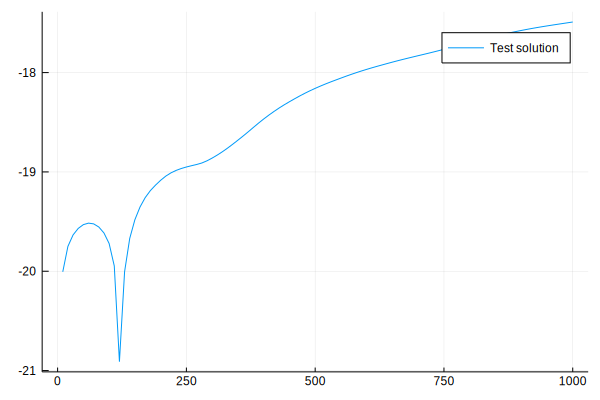

In [31]:
plot(sol.t,log10.(abs.(ΔE)), label="Test solution")

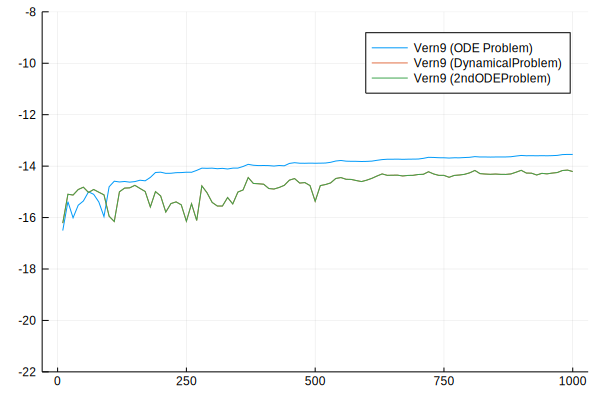

In [32]:
ylimit1=-22
ylimit2=-8
plot(sol1.t,log10.(abs.(ΔE1)), label="Vern9 (ODE Problem)",
     ylims=(ylimit1,ylimit2),)
plot!(sol11.t,log10.(abs.(ΔE11)), label="Vern9 (DynamicalProblem)",
     ylims=(ylimit1,ylimit2),)
plot!(sol21.t,log10.(abs.(ΔE21)), label="Vern9 (2ndODEProblem)",
     ylims=(ylimit1,ylimit2),)
#plot!(sol22.t,log10.(abs.(ΔE22)), label="DPRKN12 (2ndODEProblem)",
#     ylims=(ylimit1,ylimit2),)


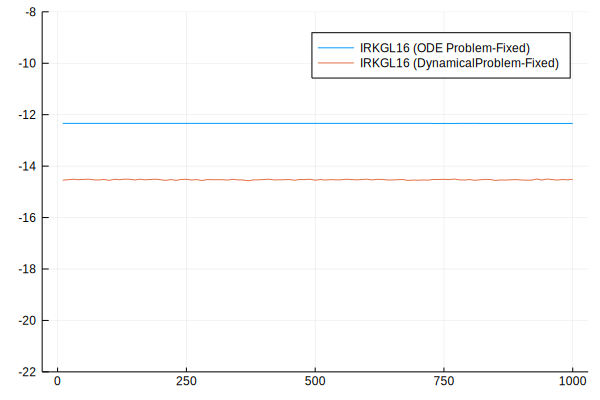

In [33]:
plot(sol2.t,log10.(abs.(ΔE2)), label="IRKGL16 (ODE Problem-Fixed)",
     ylims=(ylimit1,ylimit2),)
plot!(sol12.t,log10.(abs.(ΔE12)), label="IRKGL16 (DynamicalProblem-Fixed)",
     ylims=(ylimit1,ylimit2),)

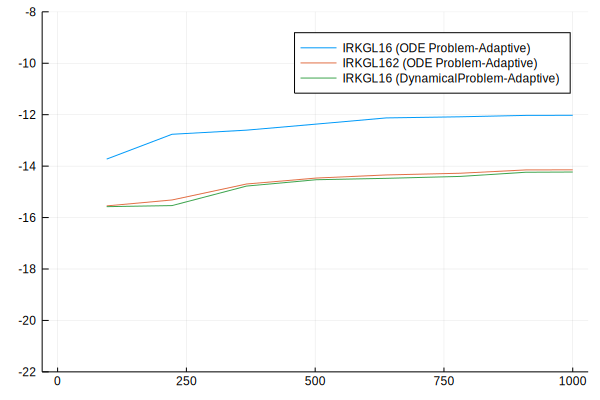

In [34]:
plot(sol3.t,log10.(abs.(ΔE3)), label="IRKGL16 (ODE Problem-Adaptive)",
     ylims=(ylimit1,ylimit2),)
plot!(sol4.t,log10.(abs.(ΔE4)), label="IRKGL162 (ODE Problem-Adaptive)",
     ylims=(ylimit1,ylimit2),)
plot!(sol13.t,log10.(abs.(ΔE13)), label="IRKGL16 (DynamicalProblem-Adaptive)",
     ylims=(ylimit1,ylimit2),)

<a href="#top">Back to the top</a>

## Work-Precision diagrams

In [35]:
Threads.nthreads()

2

In [36]:
abstols = 1.0 ./ 10.0 .^ (8:14)
reltols = 1.0 ./ 10.0 .^ (8:14)
dts=10.0./2.0.^(0:length(reltols)-1)

7-element Array{Float64,1}:
 10.0    
  5.0    
  2.5    
  1.25   
  0.625  
  0.3125 
  0.15625

### OdeProblem

In [37]:
now()

2020-05-13T07:48:20.27

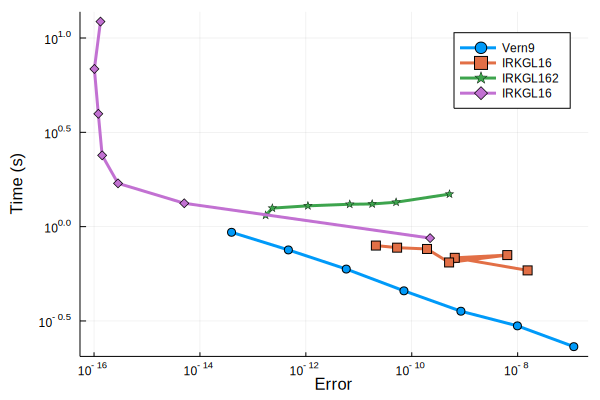

In [38]:
setups = [
          Dict(:alg=>Vern9()),
          Dict(:alg=>IRKGL16()),
          Dict(:alg=>IRKGL162()),
          Dict(:alg=>IRKGL16(),:adaptive=>false,:dts=>dts) 
]
wp1 = WorkPrecisionSet(prob,abstols,reltols,setups;appxsol=test_sol,save_everystep=false,numruns=1,maxiters=100000)
plot(wp1)

In [39]:
now()

2020-05-13T07:51:03.048

### DynamicalProblem

In [40]:
println("maxiter=",mean(iters13))

maxiter=7.222222222222222


In [41]:
ux=sol.u[end]
solx=ArrayPartition(ux[2,:,:],ux[1,:,:])
test_solx = TestSolution(tspan128,[solx]);

In [42]:
now()

2020-05-13T07:51:03.402

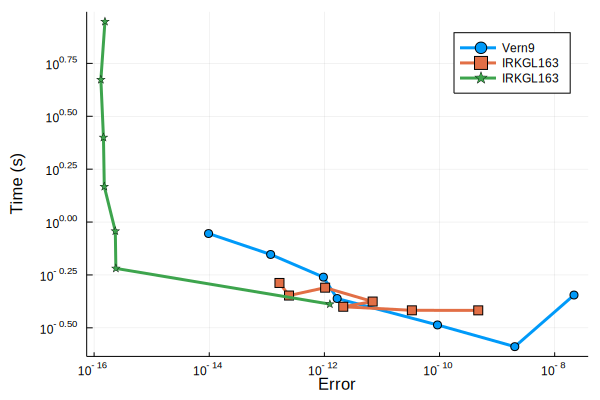

In [43]:
setups = [
          Dict(:alg=>Vern9()),
          Dict(:alg=>IRKGL163()),
          Dict(:alg=>IRKGL163(),:adaptive=>false,:dts=>dts) 
]
wp2 = WorkPrecisionSet(probdyn,abstols,reltols,setups;appxsol=test_solx,save_everystep=false,numruns=1,maxiters=100000)
plot(wp2)

In [44]:
now()

2020-05-13T07:52:33.71

### SecondOrderProblem

In [45]:
ux=sol.u[end]
solx2nd=ArrayPartition(ux[1,:,:],ux[2,:,:])
test_solx2nd = TestSolution(tspan128,[solx2nd]);

In [46]:
now()

2020-05-13T07:52:33.715

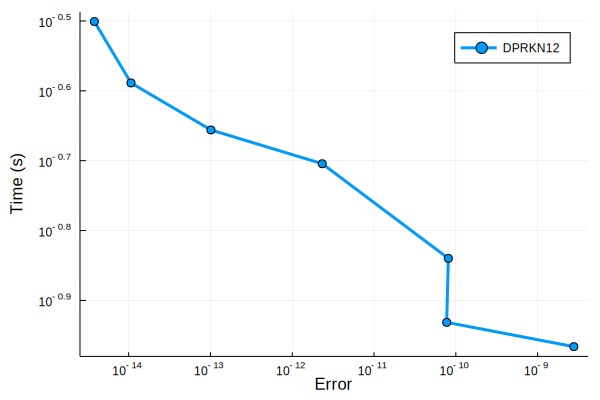

In [47]:
setups = [
          Dict(:alg=>DPRKN12())   
]
wp3 = WorkPrecisionSet(prob2nd,abstols,reltols,setups;appxsol=test_solx2nd,save_everystep=false,numruns=1,maxiters=100000)
plot(wp3)

In [48]:
now()

2020-05-13T07:52:40.535

### DynamicalProblem and SecondOrderProblem in the same plot

In [49]:
#wp3.wps[1].times
#wp3.wps[1].errors

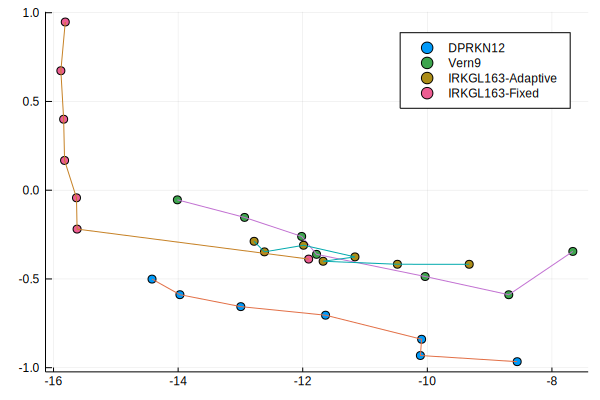

In [50]:
plot(log10.(wp3.wps[1].errors),log10.(wp3.wps[1].times), seriestype=:scatter, label="DPRKN12")
plot!(log10.(wp3.wps[1].errors),log10.(wp3.wps[1].times), label="")
%
plot!(log10.(wp2.wps[1].errors),log10.(wp2.wps[1].times), seriestype=:scatter, label="Vern9")
plot!(log10.(wp2.wps[1].errors),log10.(wp2.wps[1].times), label="")
%
plot!(log10.(wp2.wps[2].errors),log10.(wp2.wps[2].times), seriestype=:scatter, label="IRKGL163-Adaptive")
plot!(log10.(wp2.wps[2].errors),log10.(wp2.wps[2].times), label="")
%
plot!(log10.(wp2.wps[3].errors),log10.(wp2.wps[3].times), seriestype=:scatter, label="IRKGL163-Fixed")
plot!(log10.(wp2.wps[3].errors),log10.(wp2.wps[3].times), label="")

<a href="#top">Back to the top</a>